<a href="https://colab.research.google.com/github/imraunav/pattern-recognition/blob/main/q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


# Importing Datasets

In [ ]:
path = '/drive/My Drive/Semester_1/pattern_recognition_cs669/assignment_1/q2/'
with open(path + 'l_class1.txt', mode = 'r') as file:
    file_data = file.read()
    l_class_1_features = np.array([list(map(float, x.split())) for x in file_data.splitlines()])
# print(class_1_features)

with open(path + 'l_class2.txt', mode = 'r') as file:
    file_data = file.read()
    l_class_2_features = np.array([list(map(float, x.split())) for x in file_data.splitlines()])
# print(class_2_features)

with open(path + 'l_class3.txt', mode = 'r') as file:
    file_data = file.read()
    l_class_3_features = np.array([list(map(float, x.split())) for x in file_data.splitlines()])
# print(class_3_features)

In [ ]:
with open(path + 'nl_class1.txt', mode = 'r') as file:
    file_data = file.read()
    nl_class_1_features = np.array([list(map(float, x.split())) for x in file_data.splitlines()])
# print(class_1_features)
with open(path + 'nl_class2.txt', mode = 'r') as file:
    file_data = file.read()
    nl_class_2_features = np.array([list(map(float, x.split())) for x in file_data.splitlines()])
# print(class_1_features)
with open(path + 'nl_class3.txt', mode = 'r') as file:
    file_data = file.read()
    nl_class_3_features = np.array([list(map(float, x.split())) for x in file_data.splitlines()])
# print(class_1_features)

# Some definations and calculation functions

In [ ]:
dpi = 150 #increasing this value increases computation time, be careful
cmap = 'rainbow'
alpha = 0.5

In [ ]:
# multivariate class conditional density function 
def gaussian_ccd(x, mean, cov_m):
    inv_cov_m = np.linalg.inv(cov_m)
    det_cov_m = np.linalg.det(cov_m)
    ex = np.exp(-0.5 * np.matmul((x - mean).T, np.matmul(inv_cov_m, (x - mean))))
    return (1/(((2 * np.pi) ** (len(x)/2)) * det_cov_m)) * ex

In [ ]:
def coordinates(data):
    return [x for x, y in data], [y for x, y in data]

In [ ]:
def class_divider(features, gt):
    class1 = [x for i, x in enumerate(features) if gt[i] == 1]
    class2 = [x for i, x in enumerate(features) if gt[i] == 2]
    class3 = [x for i, x in enumerate(features) if gt[i] == 3]
    return class1, class2, class3

In [ ]:
def confusion_mat(pred, actual):
    conf_mat = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
    for i in range(len(pred)):
      # conf_mat[pred[i] -1][actual[i]-1] += 1
        #pred class 1
        if pred[i] == 1 and actual[i] == 1:
            conf_mat[0][0] += 1
        elif pred[i] == 1 and actual[i] == 2:
            conf_mat[0][1] += 1
        elif pred[i] == 1 and actual[i] == 3:
            conf_mat[0][2] += 1
        # pred class 2
        elif pred[i] == 2 and actual[i] == 1:
            conf_mat[1][0] += 1
        elif pred[i] == 2 and actual[i] == 2:
            conf_mat[1][1] += 1
        elif pred[i] == 2 and actual[i] == 3:
            conf_mat[1][2] += 1
        #pred class 3
        elif pred[i] == 3 and actual[i] == 1:
            conf_mat[2][0] += 1
        elif pred[i] == 3 and actual[i] == 2:
            conf_mat[2][1] += 1
        elif pred[i] == 3 and actual[i] == 3:
            conf_mat[2][2] += 1
    
    return conf_mat

In [ ]:
def accuracy(conf_mat):
    correct_pred = conf_mat[0][0] + conf_mat[1][1] + conf_mat[2][2]
    total_pred = np.sum(conf_mat)
    return correct_pred/total_pred

In [ ]:
def precision(conf_mat):
    prec_1 = conf_mat[0][0]/(conf_mat[0][0] + conf_mat[1][0] + conf_mat[2][0])
    prec_2 = conf_mat[1][1]/(conf_mat[1][1] + conf_mat[0][1] + conf_mat[2][1])
    prec_3 = conf_mat[2][2]/(conf_mat[2][2] + conf_mat[0][2] + conf_mat[1][2])
    return (prec_1 + prec_2 + prec_3) / 3

In [ ]:
def recall(conf_mat):
    r_1 = conf_mat[0][0] / (conf_mat[0][0]+ conf_mat[1][0] + conf_mat[2][0])
    r_2 = conf_mat[1][1] / (conf_mat[1][1]+ conf_mat[0][1] + conf_mat[2][1])
    r_3 = conf_mat[2][2] / (conf_mat[2][2]+ conf_mat[0][2] + conf_mat[1][2])
    return (r_1 + r_2 + r_3) / 3

In [ ]:
def f_score(conf_mat):
    return 2/((1 / precision(conf_mat)) + (1/ recall(conf_mat)))

# Data splitting

In [ ]:
np.random.shuffle(l_class_1_features)
l_class_1_train = l_class_1_features[ : len(l_class_1_features)//2]
l_class_1_test = l_class_1_features[len(l_class_1_features)//2 : ]
np.random.shuffle(l_class_2_features)
l_class_2_train = l_class_2_features[ : len(l_class_2_features)//2]
l_class_2_test = l_class_2_features[len(l_class_2_features)//2 : ]
np.random.shuffle(l_class_3_features)
l_class_3_train = l_class_3_features[ : len(l_class_3_features)//2]
l_class_3_test = l_class_3_features[len(l_class_3_features)//2 : ]

np.random.shuffle(nl_class_1_features)
nl_class_1_train = nl_class_1_features[ : len(nl_class_1_features)//2]
nl_class_1_test = nl_class_1_features[len(nl_class_1_features)//2 : ]
np.random.shuffle(nl_class_2_features)
nl_class_2_train = nl_class_2_features[ : len(nl_class_2_features)//2]
nl_class_2_test = nl_class_2_features[len(nl_class_2_features)//2 : ]
np.random.shuffle(nl_class_3_features)
nl_class_3_train = nl_class_3_features[ : len(nl_class_3_features)//2]
nl_class_3_test = nl_class_3_features[len(nl_class_3_features)//2 : ]

In [ ]:
l_class_1_x, l_class_1_y = coordinates(l_class_1_train)
l_class_2_x, l_class_2_y = coordinates(l_class_2_train)
l_class_3_x, l_class_3_y = coordinates(l_class_3_train)

nl_class_1_x, nl_class_1_y = coordinates(nl_class_1_train)
nl_class_2_x, nl_class_2_y = coordinates(nl_class_2_train)
nl_class_3_x, nl_class_3_y = coordinates(nl_class_3_train)

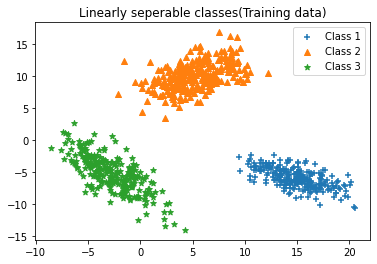

In [ ]:
plt.scatter(l_class_1_x, l_class_1_y, label = "Class 1", marker = '+')
plt.scatter(l_class_2_x, l_class_2_y, label = 'Class 2', marker = '^')
plt.scatter(l_class_3_x, l_class_3_y, label = 'Class 3', marker = '*')
plt.title('Linearly seperable classes(Training data)')
plt.legend()

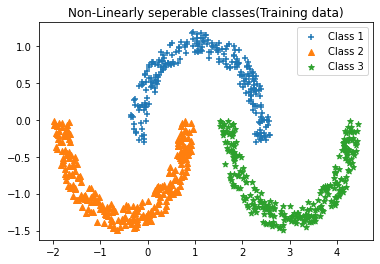

In [ ]:
plt.scatter(nl_class_1_x, nl_class_1_y, label = "Class 1", marker = '+')
plt.scatter(nl_class_2_x, nl_class_2_y, label = 'Class 2', marker = '^')
plt.scatter(nl_class_3_x, nl_class_3_y, label = 'Class 3', marker = '*')
plt.title('Non-Linearly seperable classes(Training data)')
plt.legend()

### Ground truth for test data

In [ ]:
gt_l = [1]*len(l_class_1_test) + [2]*len(l_class_2_test) + [3]*len(l_class_3_test)
test_features_l = np.concatenate((l_class_1_test, l_class_2_test, l_class_3_test))

gt_nl = [1]*len(nl_class_1_test) + [2]*len(nl_class_2_test) + [3]*len(nl_class_3_test)
test_features_nl = np.concatenate((nl_class_1_test, nl_class_2_test, nl_class_3_test))

In [ ]:
# train_features_l_x, train_features_l_y = coordinates(train_features_l)

# train_features_nl_x, train_features_l_y = coordinates(train_features_nl)

### Some constants from data

In [ ]:
mean_class_1_l = np.mean(l_class_1_train, axis = 0)
mean_class_2_l = np.mean(l_class_2_train, axis = 0)
mean_class_3_l = np.mean(l_class_3_train, axis = 0)

mean_class_1_nl = np.mean(nl_class_1_train, axis = 0)
mean_class_2_nl = np.mean(nl_class_2_train, axis = 0)
mean_class_3_nl = np.mean(nl_class_3_train, axis = 0)

prior_class_1_l = gt_l.count(1)/len(gt_l)
prior_class_2_l = gt_l.count(2)/len(gt_l)
prior_class_3_l = gt_l.count(3)/len(gt_l)

prior_class_1_nl = gt_nl.count(1)/len(gt_nl)
prior_class_2_nl = gt_nl.count(2)/len(gt_nl)
prior_class_3_nl = gt_nl.count(3)/len(gt_nl)

# Bayes classifers

## Linearly seperable features

### Classifier 1
C1: Covariance for all classes is $I\sigma^{2}$. Use the average of the sample variances for all dimensions, for all classes, from the training data as $\sigma^{2}$.

In [ ]:
var_class_1 = np.var(l_class_1_train, axis = 0, dtype = np.float64)
var_class_2 = np.var(l_class_2_train, axis = 0, dtype = np.float64)
var_class_3 = np.var(l_class_3_train, axis = 0, dtype = np.float64)

avg_var = (var_class_1 + var_class_2 + var_class_3) / 3
cov_classifier_1 = np.identity(2)* avg_var
print(f'Covariance matrix =\n{cov_classifier_1}')


Covariance matrix =
[[5.81855765 0.        ]
 [0.         5.06493311]]


In [ ]:
def classifier_1(features, mean_set, prior_set, cov_m): #here x is the feature vector
    pred = []
    for x in features:
        evidence = gaussian_ccd(x, mean_set[0], cov_m) * prior_set[0] +  gaussian_ccd(x, mean_set[1], cov_m) * prior_set[1] +  gaussian_ccd(x, mean_set[2], cov_m) * prior_set[2]
        posterior_class_1 = gaussian_ccd(x, mean_set[0], cov_m) * prior_set[0] / evidence
        posterior_class_2 = gaussian_ccd(x, mean_set[1], cov_m) * prior_set[1] / evidence
        posterior_class_3 = gaussian_ccd(x, mean_set[2], cov_m) * prior_set[2] / evidence 
        
        classify = np.argmax([posterior_class_1, posterior_class_2, posterior_class_3]) 
        pred.append(classify + 1)
    return pred

In [ ]:
#for linear data
mean_set = [mean_class_1_l, mean_class_2_l, mean_class_3_l]
prior_set = [prior_class_1_l, prior_class_2_l, prior_class_3_l]

pred_l_classifier_1 = classifier_1(test_features_l, mean_set, prior_set, cov_classifier_1)

confusion_matrix_classifier_1 = confusion_mat(pred_l_classifier_1, gt_l)

# mean_set, prior_set
accuracy_classifier_1 = accuracy(confusion_matrix_classifier_1)
precision_classifier_1 = precision(confusion_matrix_classifier_1)
recall_classifier_1 = recall(confusion_matrix_classifier_1)
f_score_classifier_1 = f_score(confusion_matrix_classifier_1)
# #incorrect results, verify the classificaton and the metric calculation functions
print(f'Confusion matrix = \n{confusion_matrix_classifier_1}')
print(f'Classifier ferformance for linearly seperable dataset\nAccuracy = {accuracy_classifier_1}\nPrecision = {precision_classifier_1}\nRecall = {recall_classifier_1}\nF-Score = {f_score_classifier_1}')


Confusion matrix = 
[[250   0   0]
 [  0 250   0]
 [  0   0 250]]
Classifier ferformance for linearly seperable dataset
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F-Score = 1.0


In [ ]:
class_x1, class_y1 = coordinates(l_class_1_test)
class_x2, class_y2 = coordinates(l_class_2_test)
class_x3, class_y3 = coordinates(l_class_3_test)

min_x = min([min(class_x1), min(class_x2), min(class_x3)])
max_x = max([max(class_x1), max(class_x2), max(class_x3)])

min_y = min([min(class_y1), min(class_y2), min(class_y3)])
max_y = max([max(class_y1), max(class_y2), max(class_y3)])

xx, yy = np.meshgrid(np.linspace(min_x - 1, max_x + 1 , dpi), np.linspace(min_y - 1, max_y + 1, dpi)) # creates a mesh of points in space 
mesh_features_x = np.array([[x, 0] for x in xx.ravel()])
mesh_features_y = np.array([[0, y] for y in yy.ravel()])
mesh_features = mesh_features_x + mesh_features_y
z = np.array(classifier_1(mesh_features, mean_set, prior_set, cov_classifier_1))
z = z.reshape(xx.shape)

min_x, max_x, min_y, max_y

(-9.3855, 21.89, -14.585, 15.238)

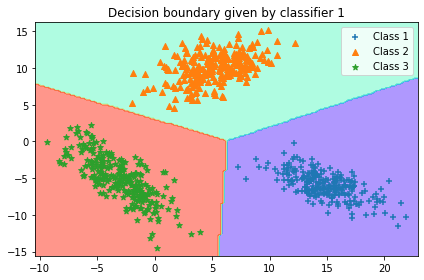

In [ ]:
plt.contourf(xx, yy, z, alpha = alpha, cmap = cmap)
plt.scatter(class_x1, class_y1, label = 'Class 1', marker = '+')
plt.scatter(class_x2, class_y2, label = 'Class 2', marker = '^')
plt.scatter(class_x3, class_y3, label = 'Class 3', marker = '*')
plt.title('Decision boundary given by classifier 1')
plt.legend()
plt.tight_layout(rect = [0, 0, 1, 1])

### Classifier 2
C2: Full but equal covariance for all classes, $\Sigma$. Use the average of the sample covariance matrix from all classes in the train data as $\Sigma$.

In [ ]:
cov_class_1 = np.cov(l_class_1_train.T)
cov_class_2 = np.cov(l_class_2_train.T)
cov_class_3 = np.cov(l_class_3_train.T)

cov_classifier_2 = (cov_class_1 + cov_class_2 + cov_class_3) / 3
print(f'Covariance matrix =\n{cov_classifier_2}')

Covariance matrix =
[[ 5.84192535 -1.54971362]
 [-1.54971362  5.08527421]]


In [ ]:
def classifier_2(features, mean_set, prior_set, cov_m): #here x is the feature vector
    pred = []
    for x in features:
        evidence = gaussian_ccd(x, mean_set[0], cov_m) * prior_set[0] +  gaussian_ccd(x, mean_set[1], cov_m) * prior_set[1] +  gaussian_ccd(x, mean_set[2], cov_m) * prior_set[2]
        posterior_class_1 = gaussian_ccd(x, mean_set[0], cov_m) * prior_set[0] / evidence
        posterior_class_2 = gaussian_ccd(x, mean_set[1], cov_m) * prior_set[1] / evidence
        posterior_class_3 = gaussian_ccd(x, mean_set[2], cov_m) * prior_set[2] / evidence 
        
        classify = np.argmax([posterior_class_1, posterior_class_2, posterior_class_3]) 
        pred.append(classify + 1)
    return pred

In [ ]:
#for linear data
mean_set = [mean_class_1_l, mean_class_2_l, mean_class_3_l]
prior_set = [prior_class_1_l, prior_class_2_l, prior_class_3_l]

pred_l_classifier_2 = classifier_2(test_features_l, mean_set, prior_set, cov_classifier_2)

confusion_matrix_classifier_2 = confusion_mat(pred_l_classifier_2, gt_l)

# mean_set, prior_set
accuracy_classifier_2 = accuracy(confusion_matrix_classifier_2)
precision_classifier_2 = precision(confusion_matrix_classifier_2)
recall_classifier_2 = recall(confusion_matrix_classifier_2)
f_score_classifier_2 = f_score(confusion_matrix_classifier_2)
# #incorrect results, verify the classificaton and the metric calculation functions
print(f'Confusion matrix = \n{confusion_matrix_classifier_2}')
print(f'Classifier ferformance for linearly seperable dataset\nAccuracy = {accuracy_classifier_2}\nPrecision = {precision_classifier_2}\nRecall = {recall_classifier_2}\nF-Score = {f_score_classifier_2}')


Confusion matrix = 
[[250   0   0]
 [  0 250   0]
 [  0   0 250]]
Classifier ferformance for linearly seperable dataset
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F-Score = 1.0


In [ ]:
class_x1, class_y1 = coordinates(l_class_1_test)
class_x2, class_y2 = coordinates(l_class_2_test)
class_x3, class_y3 = coordinates(l_class_3_test)

min_x = min([min(class_x1), min(class_x2), min(class_x3)])
max_x = max([max(class_x1), max(class_x2), max(class_x3)])

min_y = min([min(class_y1), min(class_y2), min(class_y3)])
max_y = max([max(class_y1), max(class_y2), max(class_y3)])

xx, yy = np.meshgrid(np.linspace(min_x - 1, max_x + 1 , dpi), np.linspace(min_y - 1, max_y + 1, dpi)) # creates a mesh of points in space 
mesh_features_x = np.array([[x, 0] for x in xx.ravel()])
mesh_features_y = np.array([[0, y] for y in yy.ravel()])
mesh_features = mesh_features_x + mesh_features_y
z = np.array(classifier_2(mesh_features, mean_set, prior_set, cov_classifier_2))
z = z.reshape(xx.shape)

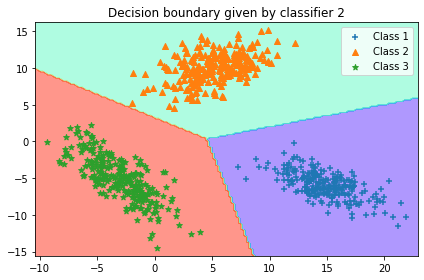

In [ ]:
plt.contourf(xx, yy, z, alpha = alpha, cmap = cmap)
plt.scatter(class_x1, class_y1, label = 'Class 1', marker = '+')
plt.scatter(class_x2, class_y2, label = 'Class 2', marker = '^')
plt.scatter(class_x3, class_y3, label = 'Class 3', marker = '*')
plt.title('Decision boundary given by classifier 2')
plt.legend()
plt.tight_layout(rect = [0, 0, 1, 1])

### Classifier 3
C3: Diagonal covariance matrix, distinct for each class. Use variances from the sample covariance matrix for each class.

In [ ]:
var_class_1 = np.var(l_class_1_train, axis = 0, dtype = np.float64)
var_class_2 = np.var(l_class_2_train, axis = 0, dtype = np.float64)
var_class_3 = np.var(l_class_3_train, axis = 0, dtype = np.float64)

# avg_var = (var_class_1 + var_class_2 + var_class_3) / 3

cov_classifier_3 = [np.identity(2)* var_class_1, np.identity(2)* var_class_2, np.identity(2)* var_class_3]
print(f'Class 1 Covariance matrix =\n{cov_classifier_3[0]}\n')
print(f'Class 2 Covariance matrix =\n{cov_classifier_3[1]}\n')
print(f'Class 3 Covariance matrix =\n{cov_classifier_3[2]}\n')

Class 1 Covariance matrix =
[[5.44612439 0.        ]
 [0.         2.39025515]]

Class 2 Covariance matrix =
[[6.41956676 0.        ]
 [0.         4.62748794]]

Class 3 Covariance matrix =
[[5.58998181 0.        ]
 [0.         8.17705623]]



In [ ]:
def classifier_3(features, mean_set, prior_set, cov_m): #here x is the feature vector
    pred = []
    for x in features:
        evidence = gaussian_ccd(x, mean_set[0], cov_m[0]) * prior_set[0] +  gaussian_ccd(x, mean_set[1], cov_m[1]) * prior_set[1] +  gaussian_ccd(x, mean_set[2], cov_m[2]) * prior_set[2]
        posterior_class_1 = gaussian_ccd(x, mean_set[0], cov_m[0]) * prior_set[0] / evidence
        posterior_class_2 = gaussian_ccd(x, mean_set[1], cov_m[1]) * prior_set[1] / evidence
        posterior_class_3 = gaussian_ccd(x, mean_set[2], cov_m[2]) * prior_set[2] / evidence 
        
        classify = np.argmax([posterior_class_1, posterior_class_2, posterior_class_3]) 
        pred.append(classify + 1)
    return pred

In [ ]:
#for linear data
mean_set = [mean_class_1_l, mean_class_2_l, mean_class_3_l]
prior_set = [prior_class_1_l, prior_class_2_l, prior_class_3_l]

pred_l_classifier_3 = classifier_3(test_features_l, mean_set, prior_set, cov_classifier_3)

confusion_matrix_classifier_3 = confusion_mat(pred_l_classifier_3, gt_l)

# mean_set, prior_set
accuracy_classifier_3 = accuracy(confusion_matrix_classifier_3)
precision_classifier_3 = precision(confusion_matrix_classifier_3)
recall_classifier_3 = recall(confusion_matrix_classifier_3)
f_score_classifier_3 = f_score(confusion_matrix_classifier_3)
# #incorrect results, verify the classificaton and the metric calculation functions
print(f'Confusion matrix = \n{confusion_matrix_classifier_3}')
print(f'Classifier ferformance for linearly seperable dataset\nAccuracy = {accuracy_classifier_3}\nPrecision = {precision_classifier_3}\nRecall = {recall_classifier_3}\nF-Score = {f_score_classifier_3}')


Confusion matrix = 
[[250   0   0]
 [  0 250   0]
 [  0   0 250]]
Classifier ferformance for linearly seperable dataset
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F-Score = 1.0


In [ ]:
# class_x1, class_y1 = coordinates(l_class_1_test)
# class_x2, class_y2 = coordinates(l_class_2_test)
# class_x3, class_y3 = coordinates(l_class_3_test)

# min_x = min([min(class_x1), min(class_x2), min(class_x3)])
# max_x = max([max(class_x1), max(class_x2), max(class_x3)])

# min_y = min([min(class_y1), min(class_y2), min(class_y3)])
# max_y = max([max(class_y1), max(class_y2), max(class_y3)])

# xx, yy = np.meshgrid(np.linspace(min_x - 1, max_x + 1 , dpi), np.linspace(min_y - 1, max_y + 1, dpi)) # creates a mesh of points in space 
# mesh_features_x = np.array([[x, 0] for x in xx.ravel()])
# mesh_features_y = np.array([[0, y] for y in yy.ravel()])
# mesh_features = mesh_features_x + mesh_features_y
z = np.array(classifier_3(mesh_features, mean_set, prior_set, cov_classifier_3))
z = z.reshape(xx.shape)

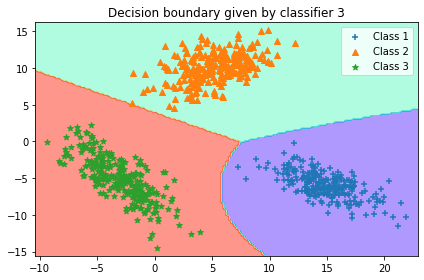

In [ ]:
plt.contourf(xx, yy, z, alpha = alpha, cmap = cmap)
plt.scatter(class_x1, class_y1, label = 'Class 1', marker = '+')
plt.scatter(class_x2, class_y2, label = 'Class 2', marker = '^')
plt.scatter(class_x3, class_y3, label = 'Class 3', marker = '*')
plt.title('Decision boundary given by classifier 3')
plt.legend()
plt.tight_layout(rect = [0, 0, 1, 1])

### Classifier 4
C4: Full covariance matrix, distinct for each class. Use the sample covariance matrix for each class.

In [ ]:
cov_class_1 = np.cov(l_class_1_train.T)
cov_class_2 = np.cov(l_class_2_train.T)
cov_class_3 = np.cov(l_class_3_train.T)

cov_classifier_4 = (cov_class_1, cov_class_2, cov_class_3)
print(f'Class 1 Covariance matrix =\n{cov_classifier_4[0]}\n')
print(f'Class 2 Covariance matrix =\n{cov_classifier_4[1]}\n')
print(f'Class 3 Covariance matrix =\n{cov_classifier_4[2]}\n')

Class 1 Covariance matrix =
[[ 5.46799637 -2.261503  ]
 [-2.261503    2.39985457]]

Class 2 Covariance matrix =
[[6.44534815 2.62476813]
 [2.62476813 4.64607223]]

Class 3 Covariance matrix =
[[ 5.61243154 -5.01240599]
 [-5.01240599  8.20989582]]



In [ ]:
def classifier_4(features, mean_set, prior_set, cov_m): #here x is the feature vector
    pred = []
    for x in features:
        evidence = gaussian_ccd(x, mean_set[0], cov_m[0]) * prior_set[0] +  gaussian_ccd(x, mean_set[1], cov_m[1]) * prior_set[1] +  gaussian_ccd(x, mean_set[2], cov_m[2]) * prior_set[2]
        posterior_class_1 = gaussian_ccd(x, mean_set[0], cov_m[0]) * prior_set[0] / evidence
        posterior_class_2 = gaussian_ccd(x, mean_set[1], cov_m[1]) * prior_set[1] / evidence
        posterior_class_3 = gaussian_ccd(x, mean_set[2], cov_m[2]) * prior_set[2] / evidence 
        
        classify = np.argmax([posterior_class_1, posterior_class_2, posterior_class_3]) 
        pred.append(classify + 1)
    return pred

In [ ]:
#for linear data
mean_set = [mean_class_1_l, mean_class_2_l, mean_class_3_l]
prior_set = [prior_class_1_l, prior_class_2_l, prior_class_3_l]

pred_l_classifier_4 = classifier_4(test_features_l, mean_set, prior_set, cov_classifier_4)

confusion_matrix_classifier_4 = confusion_mat(pred_l_classifier_4, gt_l)

# mean_set, prior_set
accuracy_classifier_4 = accuracy(confusion_matrix_classifier_4)
precision_classifier_4 = precision(confusion_matrix_classifier_4)
recall_classifier_4 = recall(confusion_matrix_classifier_4)
f_score_classifier_4 = f_score(confusion_matrix_classifier_4)
# #incorrect results, verify the classificaton and the metric calculation functions
print(f'Confusion matrix = \n{confusion_matrix_classifier_4}')
print(f'Classifier ferformance for linearly seperable dataset\nAccuracy = {accuracy_classifier_4}\nPrecision = {precision_classifier_4}\nRecall = {recall_classifier_4}\nF-Score = {f_score_classifier_4}')


Confusion matrix = 
[[250   0   0]
 [  0 250   0]
 [  0   0 250]]
Classifier ferformance for linearly seperable dataset
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F-Score = 1.0


In [ ]:
# class_x1, class_y1 = coordinates(l_class_1_test)
# class_x2, class_y2 = coordinates(l_class_2_test)
# class_x3, class_y3 = coordinates(l_class_3_test)

# min_x = min([min(class_x1), min(class_x2), min(class_x3)])
# max_x = max([max(class_x1), max(class_x2), max(class_x3)])

# min_y = min([min(class_y1), min(class_y2), min(class_y3)])
# max_y = max([max(class_y1), max(class_y2), max(class_y3)])

# xx, yy = np.meshgrid(np.linspace(min_x - 1, max_x + 1 , dpi), np.linspace(min_y - 1, max_y + 1, dpi)) # creates a mesh of points in space 
# mesh_features_x = np.array([[x, 0] for x in xx.ravel()])
# mesh_features_y = np.array([[0, y] for y in yy.ravel()])
# mesh_features = mesh_features_x + mesh_features_y
z = np.array(classifier_4(mesh_features, mean_set, prior_set, cov_classifier_4))
z = z.reshape(xx.shape)

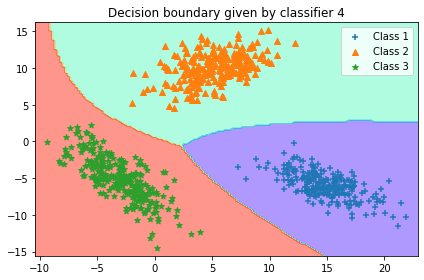

In [ ]:
plt.contourf(xx, yy, z, alpha = alpha, cmap = cmap)
plt.scatter(class_x1, class_y1, label = 'Class 1', marker = '+')
plt.scatter(class_x2, class_y2, label = 'Class 2', marker = '^')
plt.scatter(class_x3, class_y3, label = 'Class 3', marker = '*')
plt.title('Decision boundary given by classifier 4')
plt.legend()
plt.tight_layout(rect = [0, 0, 1, 1])

### Performance of classifier
Summary pf the classifier performance

In [ ]:
print('Classifier', 'Acc.', 'Prec.', 'Recall', 'F-score', sep = '\t|')
print('C1\t', f'{accuracy_classifier_1: .3f}', f'{precision_classifier_1: .3f}', f'{recall_classifier_1: .3f}', f'{f_score_classifier_1: .3f}', sep = '\t|')
print('C2\t', f'{accuracy_classifier_2: .3f}', f'{precision_classifier_2: .3f}', f'{recall_classifier_2: .3f}', f'{f_score_classifier_2: .3f}', sep = '\t|')
print('C3\t', f'{accuracy_classifier_3: .3f}', f'{precision_classifier_3: .3f}', f'{recall_classifier_3: .3f}', f'{f_score_classifier_3: .3f}', sep = '\t|')
print('C4\t', f'{accuracy_classifier_4: .3f}', f'{precision_classifier_4: .3f}', f'{recall_classifier_4: .3f}', f'{f_score_classifier_4: .3f}', sep = '\t|')

Classifier	|Acc.	|Prec.	|Recall	|F-score
C1		| 1.000	| 1.000	| 1.000	| 1.000
C2		| 1.000	| 1.000	| 1.000	| 1.000
C3		| 1.000	| 1.000	| 1.000	| 1.000
C4		| 1.000	| 1.000	| 1.000	| 1.000


## Non-linearly seperable features

### Classifier 1
C1: Covariance for all classes is $I\sigma^{2}$. Use the average of the sample variances for all dimensions, for all classes, from the training data as $\sigma^{2}$.

In [ ]:
var_class_1 = np.var(nl_class_1_train, axis = 0, dtype = np.float64)
var_class_2 = np.var(nl_class_2_train, axis = 0, dtype = np.float64)
var_class_3 = np.var(nl_class_3_train, axis = 0, dtype = np.float64)

avg_var = (var_class_1 + var_class_2 + var_class_3) / 3
cov_classifier_1 = np.identity(2)* avg_var
print(f'Covariance matrix =\n{cov_classifier_1}')


Covariance matrix =
[[0.909941   0.        ]
 [0.         0.17639097]]


In [ ]:
def classifier_1(features, mean_set, prior_set, cov_m): #here x is the feature vector
    pred = []
    for x in features:
        evidence = gaussian_ccd(x, mean_set[0], cov_m) * prior_set[0] +  gaussian_ccd(x, mean_set[1], cov_m) * prior_set[1] +  gaussian_ccd(x, mean_set[2], cov_m) * prior_set[2]
        posterior_class_1 = gaussian_ccd(x, mean_set[0], cov_m) * prior_set[0] / evidence
        posterior_class_2 = gaussian_ccd(x, mean_set[1], cov_m) * prior_set[1] / evidence
        posterior_class_3 = gaussian_ccd(x, mean_set[2], cov_m) * prior_set[2] / evidence 
        
        classify = np.argmax([posterior_class_1, posterior_class_2, posterior_class_3]) 
        pred.append(classify + 1)
    return pred

In [ ]:
#for non-linear data
mean_set = [mean_class_1_nl, mean_class_2_nl, mean_class_3_nl]
prior_set = [prior_class_1_nl, prior_class_2_nl, prior_class_3_nl]

pred_nl_classifier_1 = classifier_1(test_features_nl, mean_set, prior_set, cov_classifier_1)

confusion_matrix_classifier_1 = confusion_mat(pred_nl_classifier_1, gt_nl)

# mean_set, prior_set
accuracy_classifier_1 = accuracy(confusion_matrix_classifier_1)
precision_classifier_1 = precision(confusion_matrix_classifier_1)
recall_classifier_1 = recall(confusion_matrix_classifier_1)
f_score_classifier_1 = f_score(confusion_matrix_classifier_1)
# #incorrect results, verify the classificaton and the metric calculation functions
print(f'Confusion matrix = \n{confusion_matrix_classifier_1}')
print(f'Classifier ferformance for linearly seperable dataset\nAccuracy = {accuracy_classifier_1}\nPrecision = {precision_classifier_1}\nRecall = {recall_classifier_1}\nF-Score = {f_score_classifier_1}')


Confusion matrix = 
[[221  15  18]
 [ 17 235   0]
 [ 12   0 232]]
Classifier ferformance for linearly seperable dataset
Accuracy = 0.9173333333333333
Precision = 0.9173333333333332
Recall = 0.9173333333333332
F-Score = 0.9173333333333332


In [ ]:
class_x1, class_y1 = coordinates(nl_class_1_test)
class_x2, class_y2 = coordinates(nl_class_2_test)
class_x3, class_y3 = coordinates(nl_class_3_test)

min_x = min([min(class_x1), min(class_x2), min(class_x3)])
max_x = max([max(class_x1), max(class_x2), max(class_x3)])

min_y = min([min(class_y1), min(class_y2), min(class_y3)])
max_y = max([max(class_y1), max(class_y2), max(class_y3)])

xx, yy = np.meshgrid(np.linspace(min_x - 1, max_x + 1 , dpi), np.linspace(min_y - 1, max_y + 1, dpi)) # creates a mesh of points in space 
mesh_features_x = np.array([[x, 0] for x in xx.ravel()])
mesh_features_y = np.array([[0, y] for y in yy.ravel()])
mesh_features = mesh_features_x + mesh_features_y
z = np.array(classifier_1(mesh_features, mean_set, prior_set, cov_classifier_1))
z = z.reshape(xx.shape)

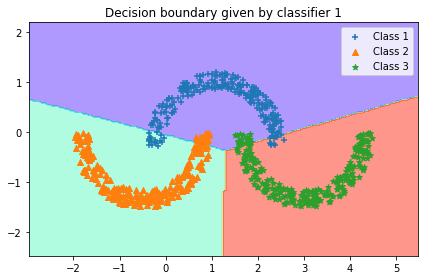

In [ ]:
plt.contourf(xx, yy, z, alpha = alpha, cmap = cmap)
plt.scatter(class_x1, class_y1, label = 'Class 1', marker = '+')
plt.scatter(class_x2, class_y2, label = 'Class 2', marker = '^')
plt.scatter(class_x3, class_y3, label = 'Class 3', marker = '*')
plt.title('Decision boundary given by classifier 1')
plt.legend()
plt.tight_layout(rect = [0, 0, 1, 1])

### Classifier 2
C2: Full but equal covariance for all classes, $\Sigma$. Use the average of the sample covariance matrix from all classes in the train data as $\Sigma$.

In [ ]:
cov_class_1 = np.cov(nl_class_1_train.T)
cov_class_2 = np.cov(nl_class_2_train.T)
cov_class_3 = np.cov(nl_class_3_train.T)

cov_classifier_2 = (cov_class_1 + cov_class_2 + cov_class_3) / 3
print(f'Covariance matrix =\n{cov_classifier_2}')

Covariance matrix =
[[ 0.91359539 -0.02165105]
 [-0.02165105  0.17709936]]


In [ ]:
def classifier_2(features, mean_set, prior_set, cov_m): #here x is the feature vector
    pred = []
    for x in features:
        evidence = gaussian_ccd(x, mean_set[0], cov_m) * prior_set[0] +  gaussian_ccd(x, mean_set[1], cov_m) * prior_set[1] +  gaussian_ccd(x, mean_set[2], cov_m) * prior_set[2]
        posterior_class_1 = gaussian_ccd(x, mean_set[0], cov_m) * prior_set[0] / evidence
        posterior_class_2 = gaussian_ccd(x, mean_set[1], cov_m) * prior_set[1] / evidence
        posterior_class_3 = gaussian_ccd(x, mean_set[2], cov_m) * prior_set[2] / evidence 
        
        classify = np.argmax([posterior_class_1, posterior_class_2, posterior_class_3]) 
        pred.append(classify + 1)
    return pred

In [ ]:
#for non-linear data
mean_set = [mean_class_1_nl, mean_class_2_nl, mean_class_3_nl]
prior_set = [prior_class_1_nl, prior_class_2_nl, prior_class_3_nl]

pred_nl_classifier_2 = classifier_2(test_features_nl, mean_set, prior_set, cov_classifier_2)

confusion_matrix_classifier_2 = confusion_mat(pred_nl_classifier_2, gt_nl)

# mean_set, prior_set
accuracy_classifier_2 = accuracy(confusion_matrix_classifier_2)
precision_classifier_2 = precision(confusion_matrix_classifier_2)
recall_classifier_2 = recall(confusion_matrix_classifier_2)
f_score_classifier_2 = f_score(confusion_matrix_classifier_2)
# #incorrect results, verify the classificaton and the metric calculation functions
print(f'Confusion matrix = \n{confusion_matrix_classifier_2}')
print(f'Classifier ferformance for linearly seperable dataset\nAccuracy = {accuracy_classifier_2}\nPrecision = {precision_classifier_2}\nRecall = {recall_classifier_2}\nF-Score = {f_score_classifier_2}')


Confusion matrix = 
[[221  16  18]
 [ 17 234   0]
 [ 12   0 232]]
Classifier ferformance for linearly seperable dataset
Accuracy = 0.916
Precision = 0.916
Recall = 0.916
F-Score = 0.9160000000000001


In [ ]:
# class_x1, class_y1 = coordinates(nl_class_1_test)
# class_x2, class_y2 = coordinates(nl_class_2_test)
# class_x3, class_y3 = coordinates(nl_class_3_test)

# min_x = min([min(class_x1), min(class_x2), min(class_x3)])
# max_x = max([max(class_x1), max(class_x2), max(class_x3)])

# min_y = min([min(class_y1), min(class_y2), min(class_y3)])
# max_y = max([max(class_y1), max(class_y2), max(class_y3)])

# xx, yy = np.meshgrid(np.linspace(min_x - 1, max_x + 1 , dpi), np.linspace(min_y - 1, max_y + 1, dpi)) # creates a mesh of points in space 
# mesh_features_x = np.array([[x, 0] for x in xx.ravel()])
# mesh_features_y = np.array([[0, y] for y in yy.ravel()])
# mesh_features = mesh_features_x + mesh_features_y
z = np.array(classifier_2(mesh_features, mean_set, prior_set, cov_classifier_2))
z = z.reshape(xx.shape)

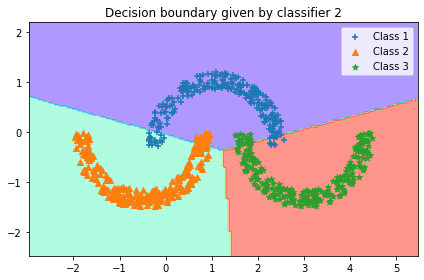

In [ ]:
plt.contourf(xx, yy, z, alpha = alpha, cmap = cmap)
plt.scatter(class_x1, class_y1, label = 'Class 1', marker = '+')
plt.scatter(class_x2, class_y2, label = 'Class 2', marker = '^')
plt.scatter(class_x3, class_y3, label = 'Class 3', marker = '*')
plt.title('Decision boundary given by classifier 2')
plt.legend()
plt.tight_layout(rect = [0, 0, 1, 1])

### Classifier 3
C3: Diagonal covariance matrix, distinct for each class. Use variances from the sample covariance matrix for each class.

In [ ]:
var_class_1 = np.var(nl_class_1_train, axis = 0, dtype = np.float64)
var_class_2 = np.var(nl_class_2_train, axis = 0, dtype = np.float64)
var_class_3 = np.var(nl_class_3_train, axis = 0, dtype = np.float64)

# avg_var = (var_class_1 + var_class_2 + var_class_3) / 3

cov_classifier_3 = [np.identity(2)* var_class_1, np.identity(2)* var_class_2, np.identity(2)* var_class_3]
print(f'Class 1 Covariance matrix =\n{cov_classifier_3[0]}\n')
print(f'Class 2 Covariance matrix =\n{cov_classifier_3[1]}\n')
print(f'Class 3 Covariance matrix =\n{cov_classifier_3[2]}\n')

Class 1 Covariance matrix =
[[0.90635349 0.        ]
 [0.         0.16287653]]

Class 2 Covariance matrix =
[[0.93601491 0.        ]
 [0.         0.18044612]]

Class 3 Covariance matrix =
[[0.88745461 0.        ]
 [0.         0.18585025]]



In [ ]:
def classifier_3(features, mean_set, prior_set, cov_m): #here x is the feature vector
    pred = []
    for x in features:
        evidence = gaussian_ccd(x, mean_set[0], cov_m[0]) * prior_set[0] +  gaussian_ccd(x, mean_set[1], cov_m[1]) * prior_set[1] +  gaussian_ccd(x, mean_set[2], cov_m[2]) * prior_set[2]
        posterior_class_1 = gaussian_ccd(x, mean_set[0], cov_m[0]) * prior_set[0] / evidence
        posterior_class_2 = gaussian_ccd(x, mean_set[1], cov_m[1]) * prior_set[1] / evidence
        posterior_class_3 = gaussian_ccd(x, mean_set[2], cov_m[2]) * prior_set[2] / evidence 
        
        classify = np.argmax([posterior_class_1, posterior_class_2, posterior_class_3]) 
        pred.append(classify + 1)
    return pred

In [ ]:
#for linear data
mean_set = [mean_class_1_nl, mean_class_2_nl, mean_class_3_nl]
prior_set = [prior_class_1_nl, prior_class_2_nl, prior_class_3_nl]

pred_l_classifier_3 = classifier_3(test_features_nl, mean_set, prior_set, cov_classifier_3)

confusion_matrix_classifier_3 = confusion_mat(pred_l_classifier_3, gt_l)

# mean_set, prior_set
accuracy_classifier_3 = accuracy(confusion_matrix_classifier_3)
precision_classifier_3 = precision(confusion_matrix_classifier_3)
recall_classifier_3 = recall(confusion_matrix_classifier_3)
f_score_classifier_3 = f_score(confusion_matrix_classifier_3)
# #incorrect results, verify the classificaton and the metric calculation functions
print(f'Confusion matrix = \n{confusion_matrix_classifier_3}')
print(f'Classifier ferformance for linearly seperable dataset\nAccuracy = {accuracy_classifier_3}\nPrecision = {precision_classifier_3}\nRecall = {recall_classifier_3}\nF-Score = {f_score_classifier_3}')


Confusion matrix = 
[[220  15  18]
 [ 17 235   0]
 [ 13   0 232]]
Classifier ferformance for linearly seperable dataset
Accuracy = 0.916
Precision = 0.9159999999999999
Recall = 0.9159999999999999
F-Score = 0.9159999999999999


In [ ]:
# class_x1, class_y1 = coordinates(l_class_1_test)
# class_x2, class_y2 = coordinates(l_class_2_test)
# class_x3, class_y3 = coordinates(l_class_3_test)

# min_x = min([min(class_x1), min(class_x2), min(class_x3)])
# max_x = max([max(class_x1), max(class_x2), max(class_x3)])

# min_y = min([min(class_y1), min(class_y2), min(class_y3)])
# max_y = max([max(class_y1), max(class_y2), max(class_y3)])

# xx, yy = np.meshgrid(np.linspace(min_x - 1, max_x + 1 , dpi), np.linspace(min_y - 1, max_y + 1, dpi)) # creates a mesh of points in space 
# mesh_features_x = np.array([[x, 0] for x in xx.ravel()])
# mesh_features_y = np.array([[0, y] for y in yy.ravel()])
# mesh_features = mesh_features_x + mesh_features_y
z = np.array(classifier_3(mesh_features, mean_set, prior_set, cov_classifier_3))
z = z.reshape(xx.shape)

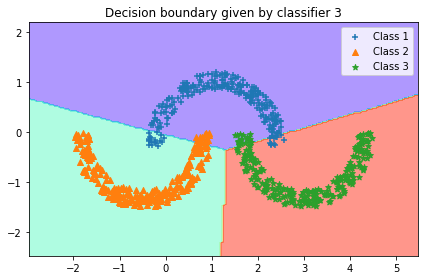

In [ ]:
plt.contourf(xx, yy, z, alpha = alpha, cmap = cmap)
plt.scatter(class_x1, class_y1, label = 'Class 1', marker = '+')
plt.scatter(class_x2, class_y2, label = 'Class 2', marker = '^')
plt.scatter(class_x3, class_y3, label = 'Class 3', marker = '*')
plt.title('Decision boundary given by classifier 3')
plt.legend()
plt.tight_layout(rect = [0, 0, 1, 1])

### Classifier 4
C4: Full covariance matrix, distinct for each class. Use the sample covariance matrix for each class.

In [ ]:
cov_class_1 = np.cov(nl_class_1_train.T)
cov_class_2 = np.cov(nl_class_2_train.T)
cov_class_3 = np.cov(nl_class_3_train.T)

cov_classifier_4 = (cov_class_1, cov_class_2, cov_class_3)
print(f'Class 1 Covariance matrix =\n{cov_classifier_4[0]}\n')
print(f'Class 2 Covariance matrix =\n{cov_classifier_4[1]}\n')
print(f'Class 3 Covariance matrix =\n{cov_classifier_4[2]}\n')

Class 1 Covariance matrix =
[[ 0.90999347 -0.04902751]
 [-0.04902751  0.16353065]]

Class 2 Covariance matrix =
[[ 0.939774   -0.00378307]
 [-0.00378307  0.1811708 ]]

Class 3 Covariance matrix =
[[ 0.89101869 -0.01214257]
 [-0.01214257  0.18659664]]



In [ ]:
def classifier_4(features, mean_set, prior_set, cov_m): #here x is the feature vector
    pred = []
    for x in features:
        evidence = gaussian_ccd(x, mean_set[0], cov_m[0]) * prior_set[0] +  gaussian_ccd(x, mean_set[1], cov_m[1]) * prior_set[1] +  gaussian_ccd(x, mean_set[2], cov_m[2]) * prior_set[2]
        posterior_class_1 = gaussian_ccd(x, mean_set[0], cov_m[0]) * prior_set[0] / evidence
        posterior_class_2 = gaussian_ccd(x, mean_set[1], cov_m[1]) * prior_set[1] / evidence
        posterior_class_3 = gaussian_ccd(x, mean_set[2], cov_m[2]) * prior_set[2] / evidence 
        
        classify = np.argmax([posterior_class_1, posterior_class_2, posterior_class_3]) 
        pred.append(classify + 1)
    return pred

In [ ]:
#for linear data
mean_set = [mean_class_1_nl, mean_class_2_nl, mean_class_3_nl]
prior_set = [prior_class_1_nl, prior_class_2_nl, prior_class_3_nl]

pred_nl_classifier_4 = classifier_4(test_features_nl, mean_set, prior_set, cov_classifier_4)

confusion_matrix_classifier_4 = confusion_mat(pred_nl_classifier_4, gt_nl)

# mean_set, prior_set
accuracy_classifier_4 = accuracy(confusion_matrix_classifier_4)
precision_classifier_4 = precision(confusion_matrix_classifier_4)
recall_classifier_4 = recall(confusion_matrix_classifier_4)
f_score_classifier_4 = f_score(confusion_matrix_classifier_4)
# #incorrect results, verify the classificaton and the metric calculation functions
print(f'Confusion matrix = \n{confusion_matrix_classifier_4}')
print(f'Classifier ferformance for linearly seperable dataset\nAccuracy = {accuracy_classifier_4}\nPrecision = {precision_classifier_4}\nRecall = {recall_classifier_4}\nF-Score = {f_score_classifier_4}')


Confusion matrix = 
[[223  15  18]
 [ 18 235   0]
 [  9   0 232]]
Classifier ferformance for linearly seperable dataset
Accuracy = 0.92
Precision = 0.9199999999999999
Recall = 0.9199999999999999
F-Score = 0.9199999999999998


In [ ]:
# class_x1, class_y1 = coordinates(l_class_1_test)
# class_x2, class_y2 = coordinates(l_class_2_test)
# class_x3, class_y3 = coordinates(l_class_3_test)

# min_x = min([min(class_x1), min(class_x2), min(class_x3)])
# max_x = max([max(class_x1), max(class_x2), max(class_x3)])

# min_y = min([min(class_y1), min(class_y2), min(class_y3)])
# max_y = max([max(class_y1), max(class_y2), max(class_y3)])

# xx, yy = np.meshgrid(np.linspace(min_x - 1, max_x + 1 , dpi), np.linspace(min_y - 1, max_y + 1, dpi)) # creates a mesh of points in space 
# mesh_features_x = np.array([[x, 0] for x in xx.ravel()])
# mesh_features_y = np.array([[0, y] for y in yy.ravel()])
# mesh_features = mesh_features_x + mesh_features_y
z = np.array(classifier_4(mesh_features, mean_set, prior_set, cov_classifier_4))
z = z.reshape(xx.shape)

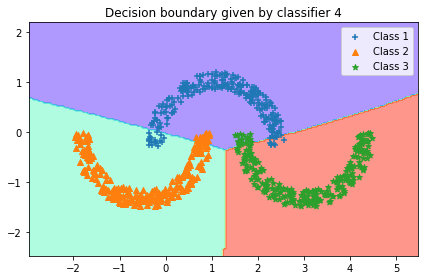

In [ ]:
plt.contourf(xx, yy, z, alpha = alpha, cmap = cmap)
plt.scatter(class_x1, class_y1, label = 'Class 1', marker = '+')
plt.scatter(class_x2, class_y2, label = 'Class 2', marker = '^')
plt.scatter(class_x3, class_y3, label = 'Class 3', marker = '*')
plt.title('Decision boundary given by classifier 4')
plt.legend()
plt.tight_layout(rect = [0, 0, 1, 1])

### Performance of classifier
Summary of the classifier performance

In [ ]:
print('Classifier', 'Acc.', 'Prec.', 'Recall', 'F-score', sep = '\t|')
print('C1\t', f'{accuracy_classifier_1: .3f}', f'{precision_classifier_1: .3f}', f'{recall_classifier_1: .3f}', f'{f_score_classifier_1: .3f}', sep = '\t|')
print('C2\t', f'{accuracy_classifier_2: .3f}', f'{precision_classifier_2: .3f}', f'{recall_classifier_2: .3f}', f'{f_score_classifier_2: .3f}', sep = '\t|')
print('C3\t', f'{accuracy_classifier_3: .3f}', f'{precision_classifier_3: .3f}', f'{recall_classifier_3: .3f}', f'{f_score_classifier_3: .3f}', sep = '\t|')
print('C4\t', f'{accuracy_classifier_4: .3f}', f'{precision_classifier_4: .3f}', f'{recall_classifier_4: .3f}', f'{f_score_classifier_4: .3f}', sep = '\t|')

Classifier	|Acc.	|Prec.	|Recall	|F-score
C1		| 0.917	| 0.917	| 0.917	| 0.917
C2		| 0.916	| 0.916	| 0.916	| 0.916
C3		| 0.916	| 0.916	| 0.916	| 0.916
C4		| 0.920	| 0.920	| 0.920	| 0.920
